In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data, check base features

In [2]:
from perovskite_data_analysis.common.storage import GoogleDriveStorage
from perovskite_data_analysis.common.credentials import google_credentials

storage = GoogleDriveStorage(google_credentials())
df = storage.download_dataframe("perovskite/data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df = df.rename(columns={"Perovskite_band_gap": "band_gap"})
df

,band_gap,tolerance_factor,A_1,A_2,A_3,A_4,A_5,A_1_coef,A_2_coef,A_3_coef,...,C_2_coef,C_3_coef,r_A,r_B,r_C,dimensionality_indicator,hydrophobicity,space_group,octahedral_factor,charge_balance
0,1.60,0.911521,MA,0,0,0,0,1.00,0.000,0.000,...,0.00,0,2.17000,1.190,2.2000,0,0,Pm3m,0.540909,0.0
1,1.60,0.911521,MA,0,0,0,0,1.00,0.000,0.000,...,0.00,0,2.17000,1.190,2.2000,0,0,Pm3m,0.540909,0.0
2,1.60,0.911521,MA,0,0,0,0,1.00,0.000,0.000,...,0.00,0,2.17000,1.190,2.2000,0,0,Pm3m,0.540909,0.0
3,1.60,0.911521,MA,0,0,0,0,1.00,0.000,0.000,...,0.00,0,2.17000,1.190,2.2000,0,0,Pm3m,0.540909,0.0
4,1.59,0.968626,Cs,FA,MA,0,0,0.05,0.788,0.162,...,2.49,0,2.42868,1.190,2.1592,0,0,Pm3m,0.551130,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4964,1.38,0.815892,Cs,0,0,0,0,1.00,0.000,0.000,...,0.00,0,1.67000,1.154,2.2000,0,0,I4/mcm,0.524545,0.0
4965,1.63,0.911521,MA,0,0,0,0,1.00,0.000,0.000,...,0.00,0,2.17000,1.190,2.2000,0,0,Pm3m,0.540909,0.0
4966,1.63,0.911521,MA,0,0,0,0,1.00,0.000,0.000,...,0.00,0,2.17000,1.190,2.2000,0,0,Pm3m,0.540909,0.0
4967,1.51,0.972261,Cs,FA,0,0,0,0.08,0.920,0.000,...,0.00,0,2.46120,1.190,2.2000,0,0,Pm3m,0.540909,0.0


In [3]:
# check for na, dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   band_gap                  4969 non-null   float64
 1   tolerance_factor          4969 non-null   float64
 2   A_1                       4969 non-null   object 
 3   A_2                       4969 non-null   object 
 4   A_3                       4969 non-null   object 
 5   A_4                       4969 non-null   object 
 6   A_5                       4969 non-null   int64  
 7   A_1_coef                  4969 non-null   float64
 8   A_2_coef                  4969 non-null   float64
 9   A_3_coef                  4969 non-null   float64
 10  A_4_coef                  4969 non-null   float64
 11  A_5_coef                  4969 non-null   int64  
 12  B_1                       4969 non-null   object 
 13  B_2                       4969 non-null   object 
 14  B_3     

In [4]:
# check for perovskite count in A, B, C
def count_ions(df: pd.DataFrame, site_prefix: str) -> pd.Series:
    site_cols = [col for col in df.columns if col.startswith(site_prefix) and "coef" not in col]
    # Stack all columns into a single series and exclude -1
    all_ions = df[site_cols].stack().reset_index(drop=True)
    all_ions = all_ions[all_ions != "0"]
    all_ions = all_ions[all_ions != 0]
    return all_ions.value_counts()


def plot_counts(ion_counts: pd.Series, site: str) -> None:
    plt.figure(figsize=(21, 10))
    ion_counts.plot(kind='bar', color='skyblue')
    plt.title(f'{site}-Site Ions', fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel('Ion')
    plt.ylabel('Count')
    plt.show()


# Get counts for A, B, and C sites
a_ion_counts = count_ions(df, 'A_')
b_ion_counts = count_ions(df, 'B_')
c_ion_counts = count_ions(df, 'C_')

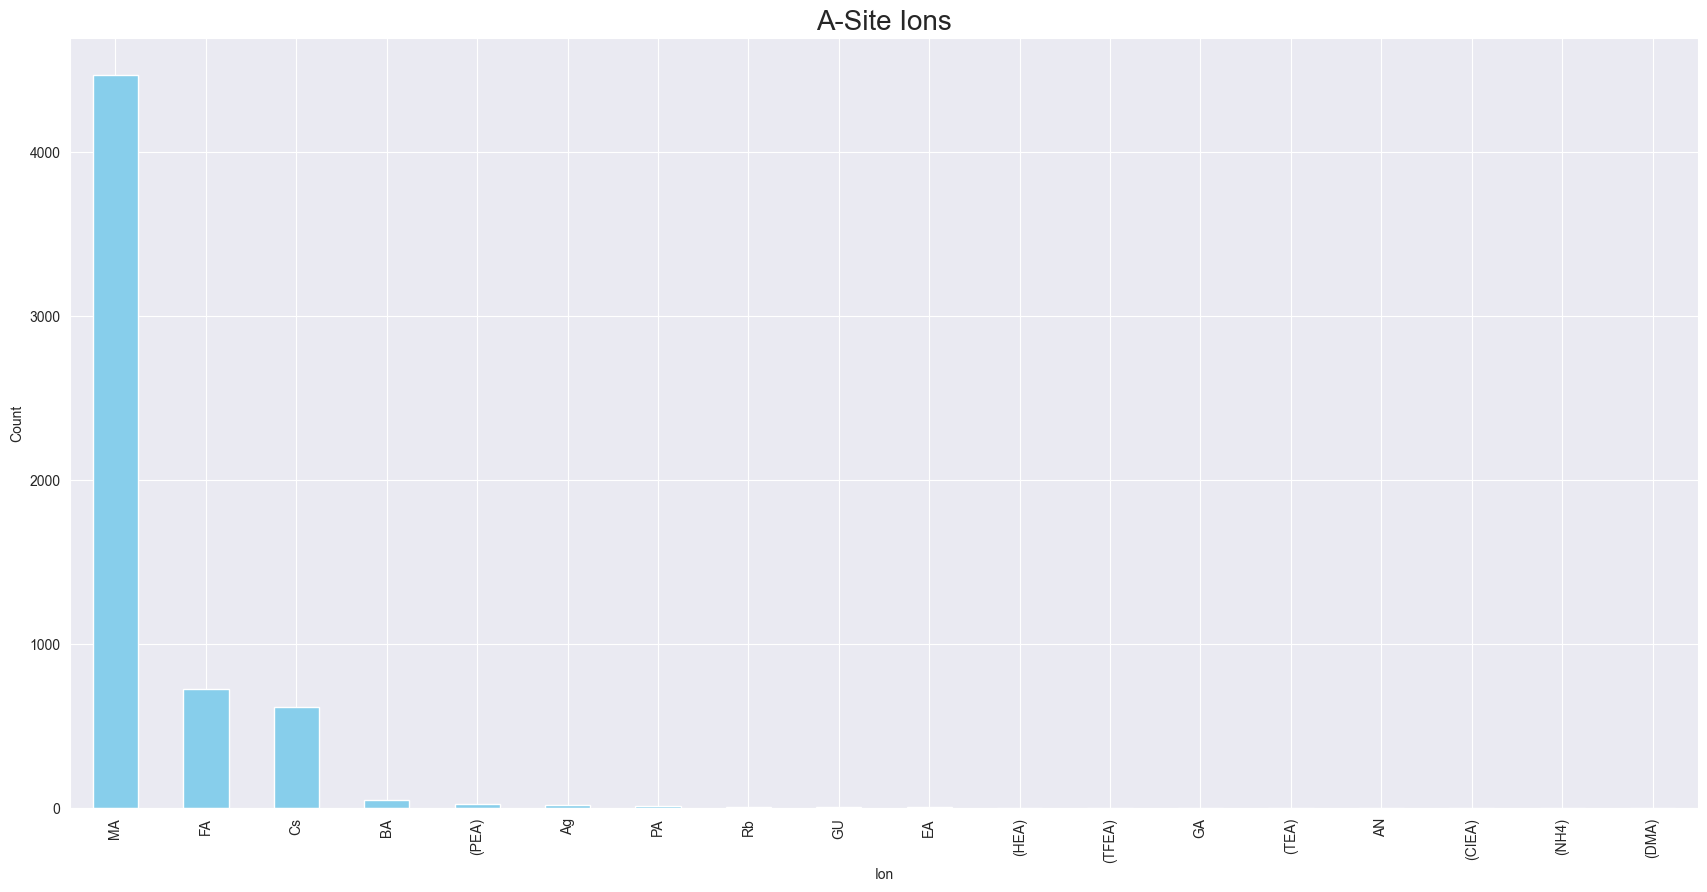

In [5]:
plot_counts(a_ion_counts, 'A')

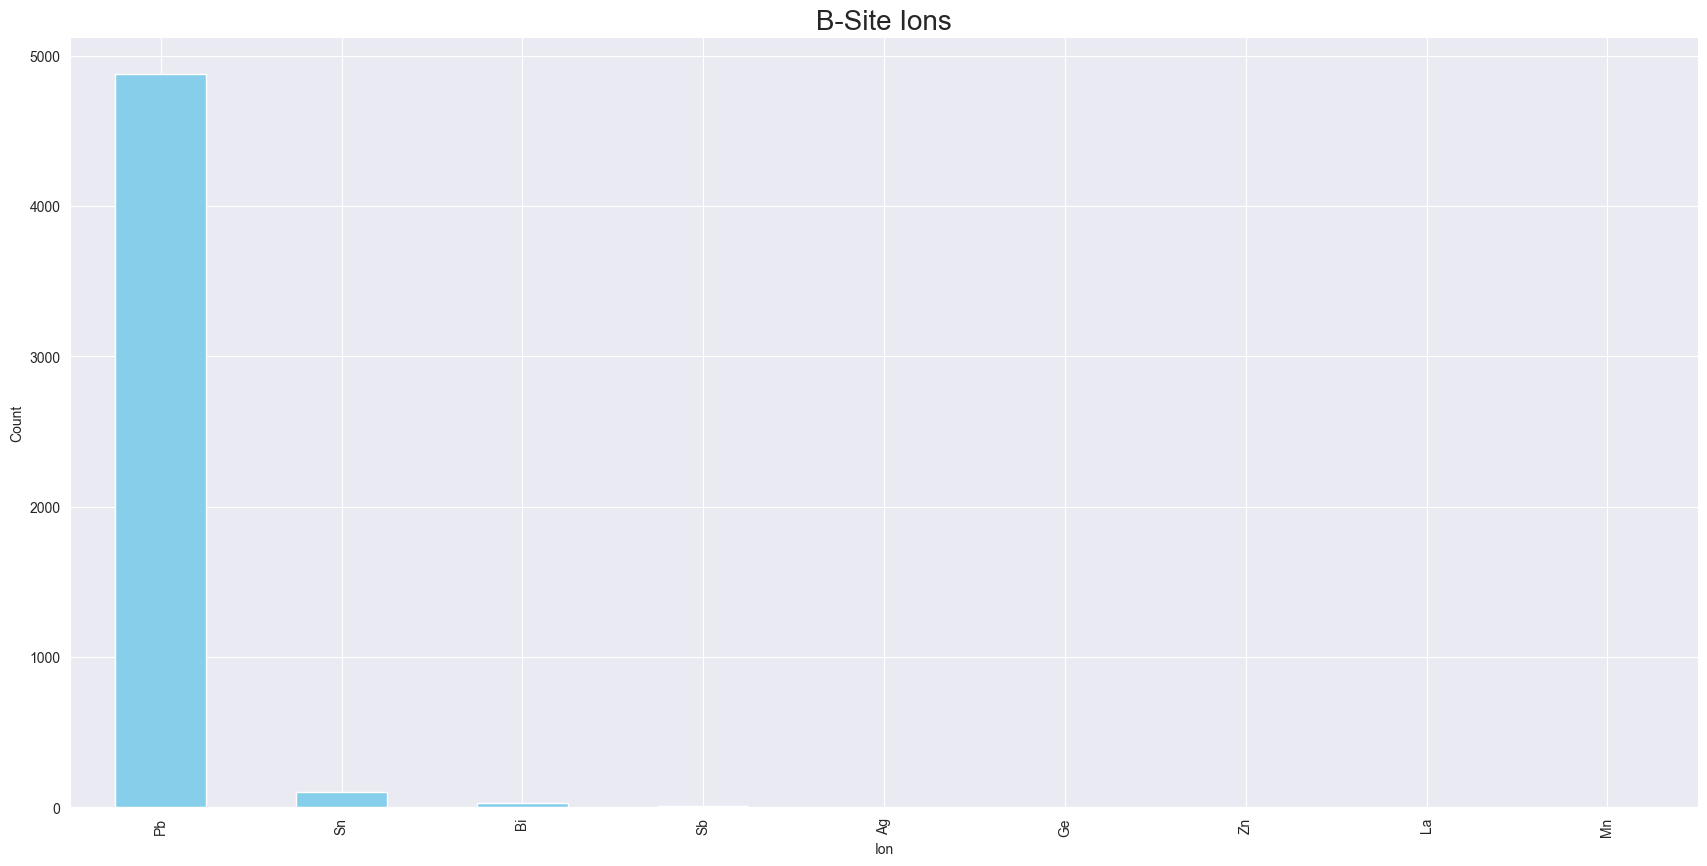

In [6]:
plot_counts(b_ion_counts, 'B')

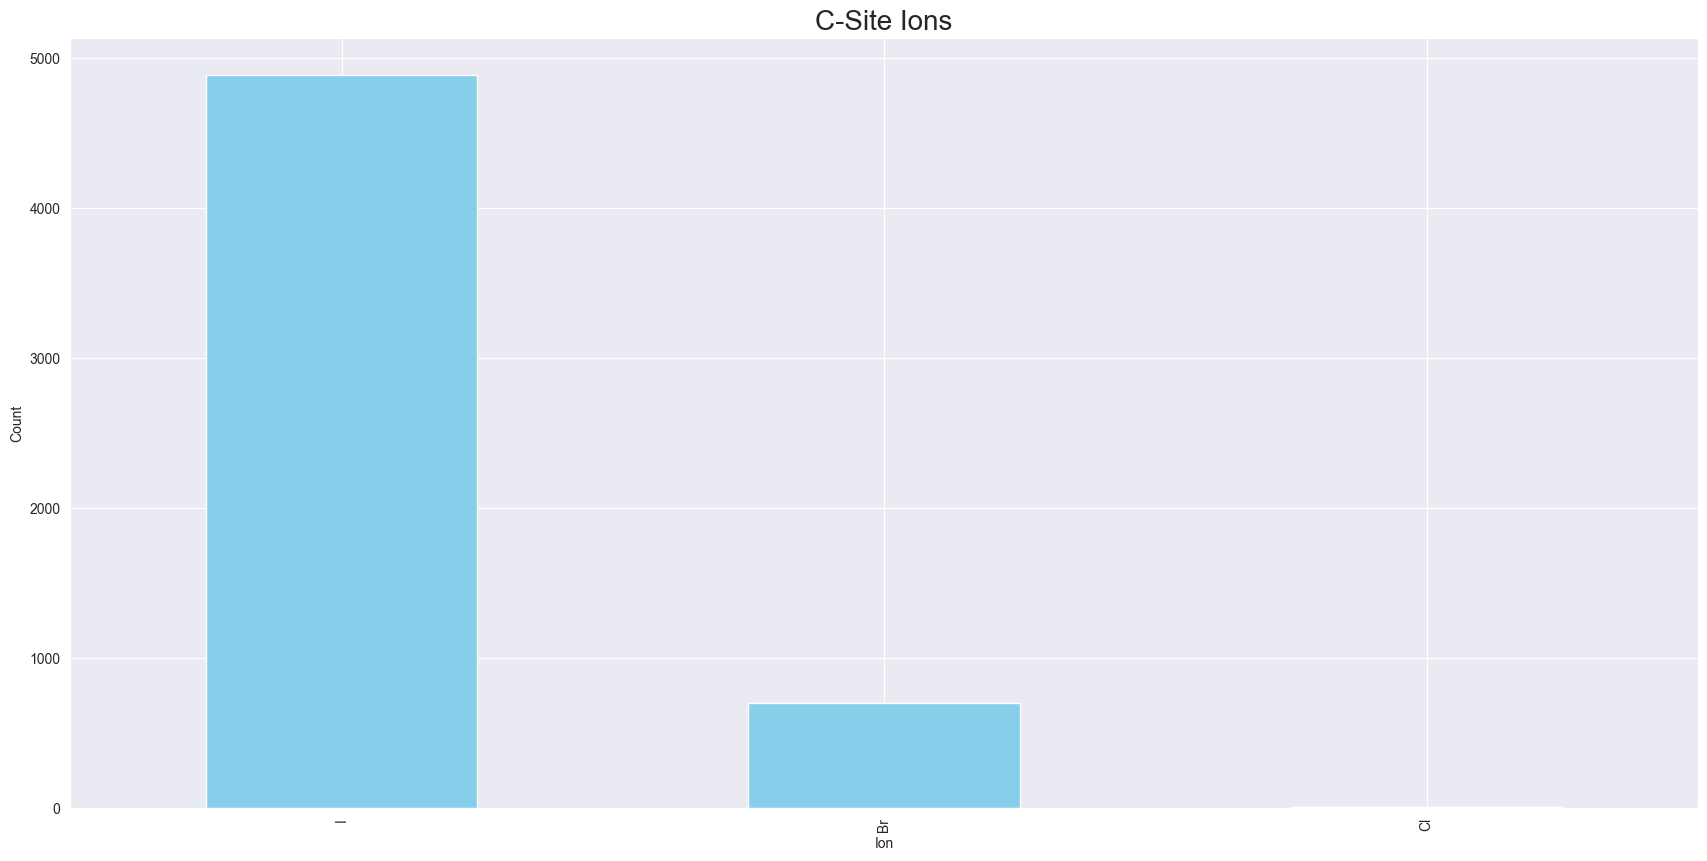

In [7]:
plot_counts(c_ion_counts, 'C')

### Model need to work only for`
### A site - MA, FA, Cs
### B site - Pb
### C site - I, Br

In [8]:
# drop unnecessary ions
a_site_ions = [0, "0", "MA", "FA", "Cs"]
b_site_ions = [0, "0", "Pb"]
c_site_ions = [0, "0", "I", "Br"]
site_params = {
    "A": (5, a_site_ions),
    "B": (3, b_site_ions),
    "C": (3, c_site_ions)
}


def drop_unnecessary_ions(site: str, df: pd.DataFrame) -> pd.DataFrame:
    site_param = site_params[site]
    feature_count, ions_to_save = site_param

    mask = pd.Series(True, index=df.index)
    for i in range(1, feature_count + 1):
        column = f"{site}_{i}"
        mask = mask & df[column].isin(ions_to_save)

    filtered_df = df[mask].reset_index(drop=True)
    return filtered_df


df = drop_unnecessary_ions("A", df)
df = drop_unnecessary_ions("B", df)
df = drop_unnecessary_ions("C", df)

In [9]:
new_a_ion_counts = count_ions(df, 'A_')
new_b_ion_counts = count_ions(df, 'B_')
new_c_ion_counts = count_ions(df, 'C_')

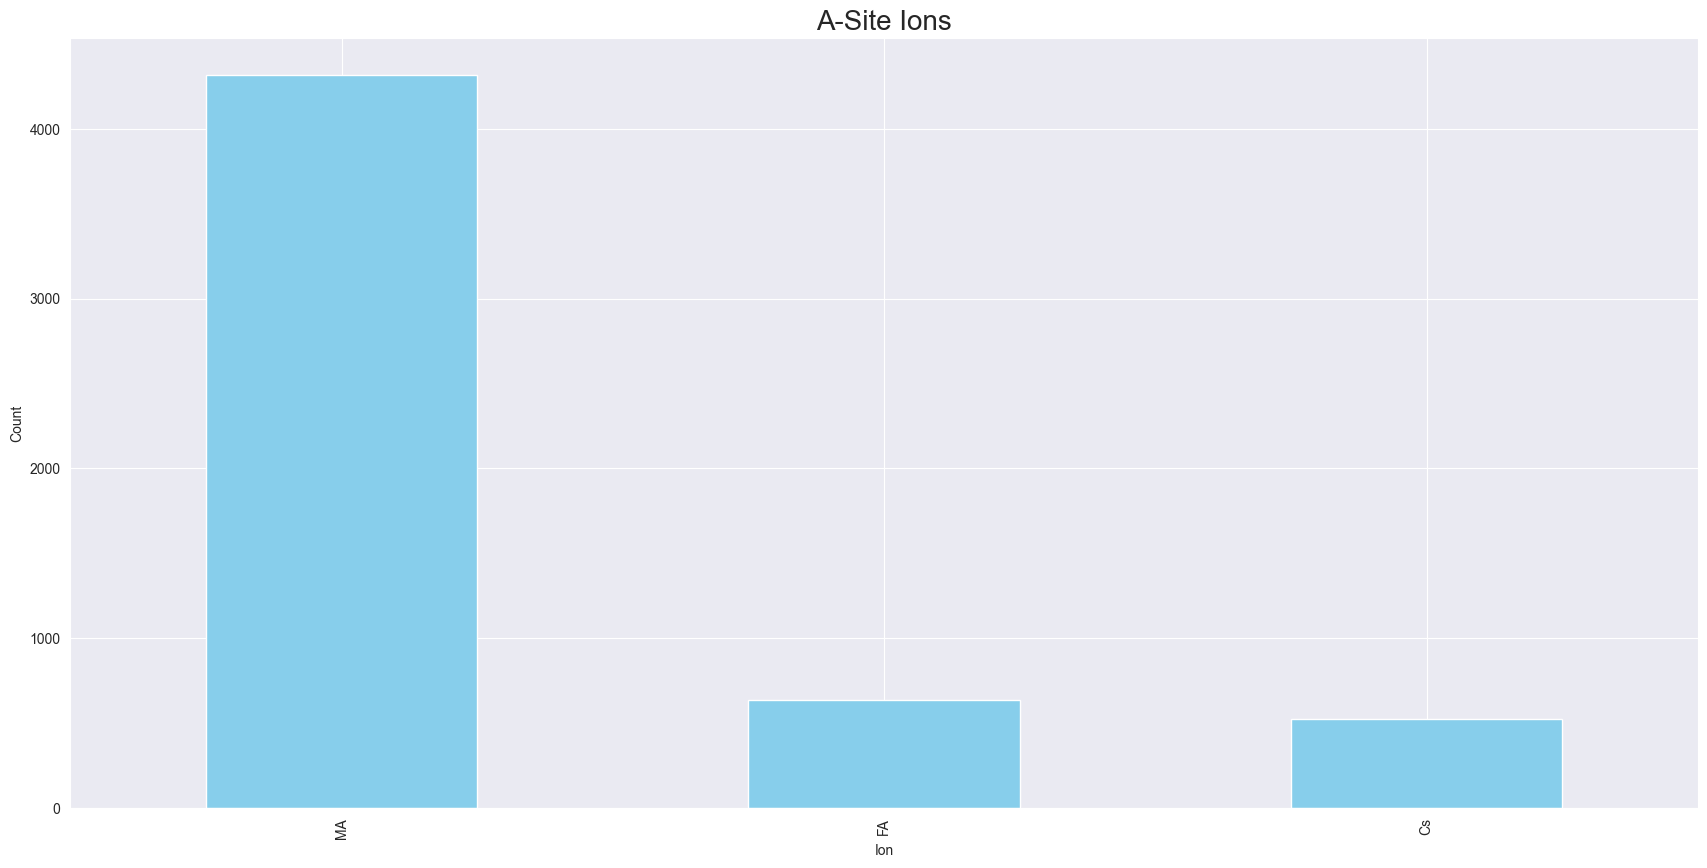

In [10]:
plot_counts(new_a_ion_counts, 'A')

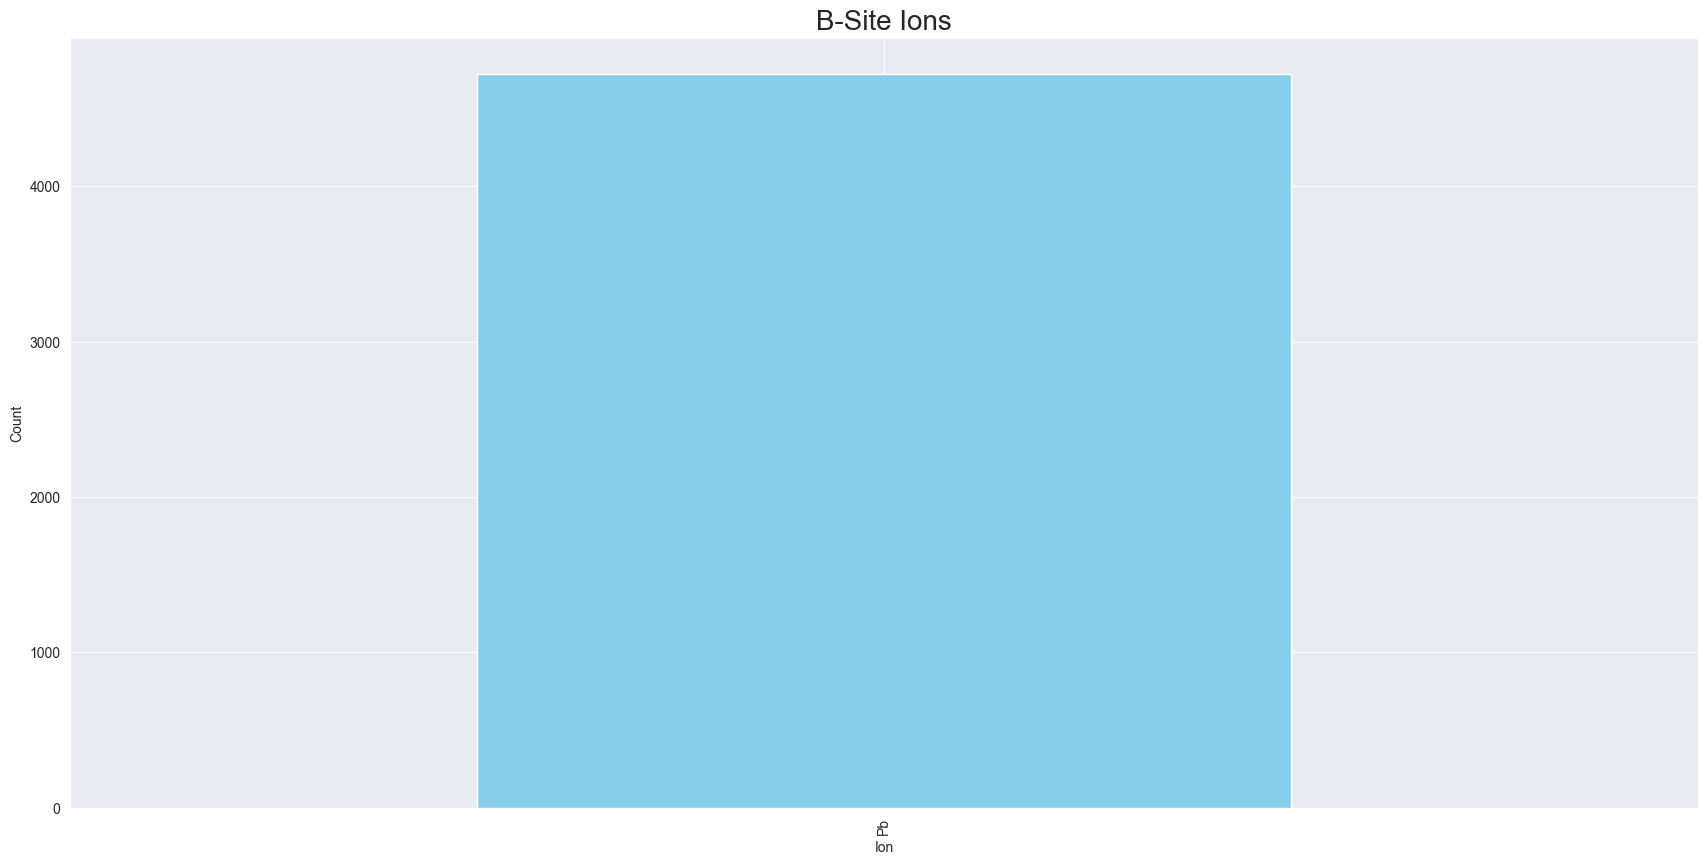

In [11]:
plot_counts(new_b_ion_counts, 'B')

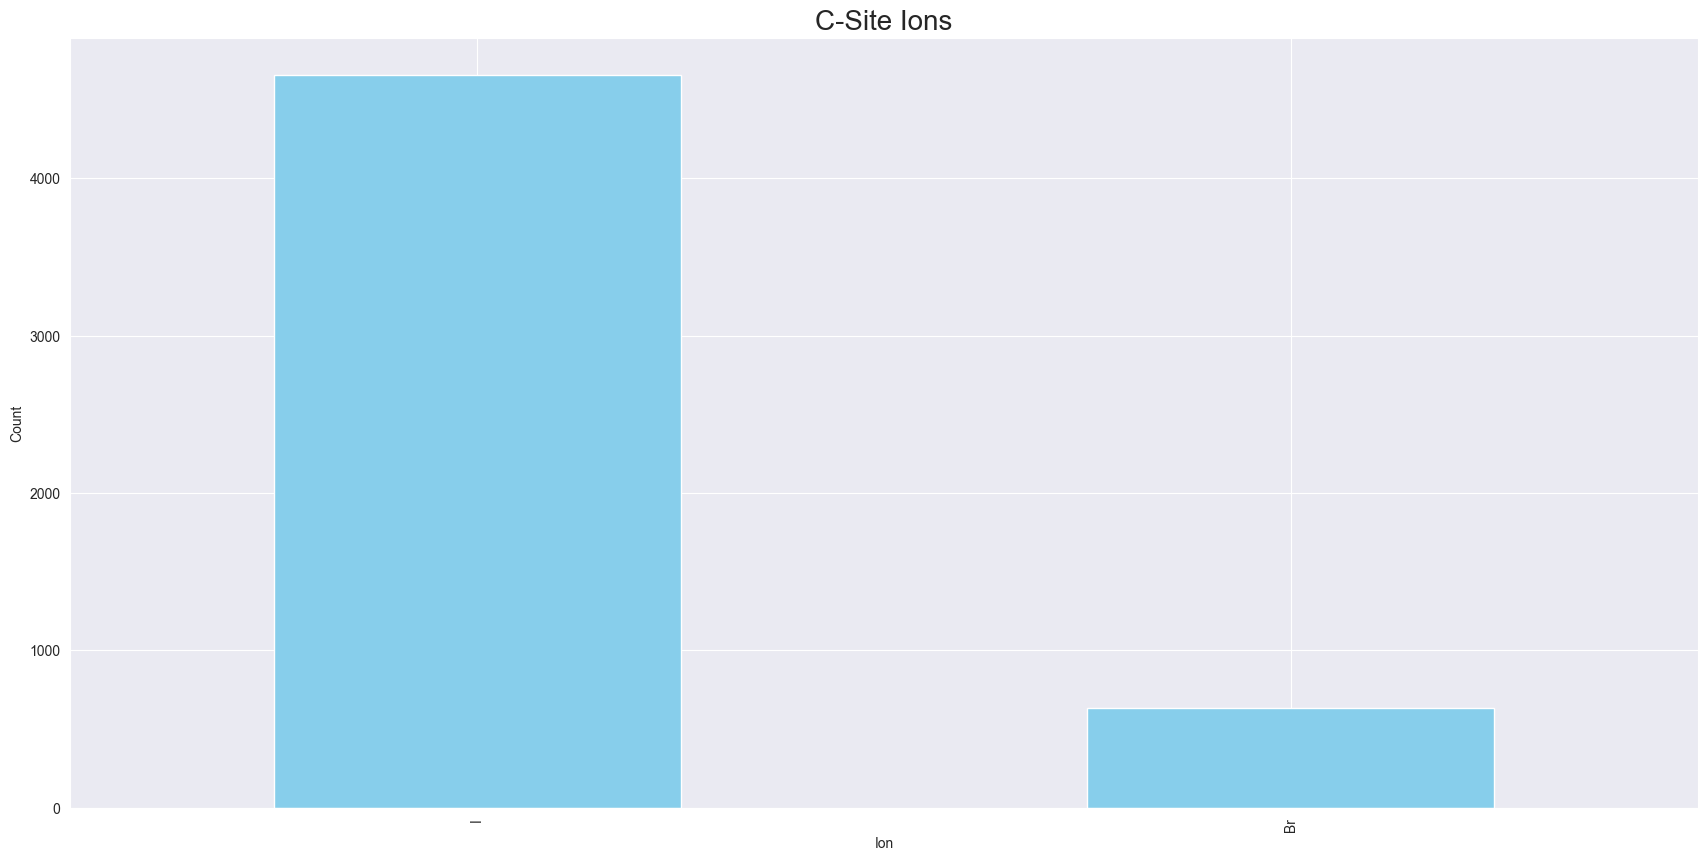

In [12]:
plot_counts(new_c_ion_counts, 'C')

### Correlation

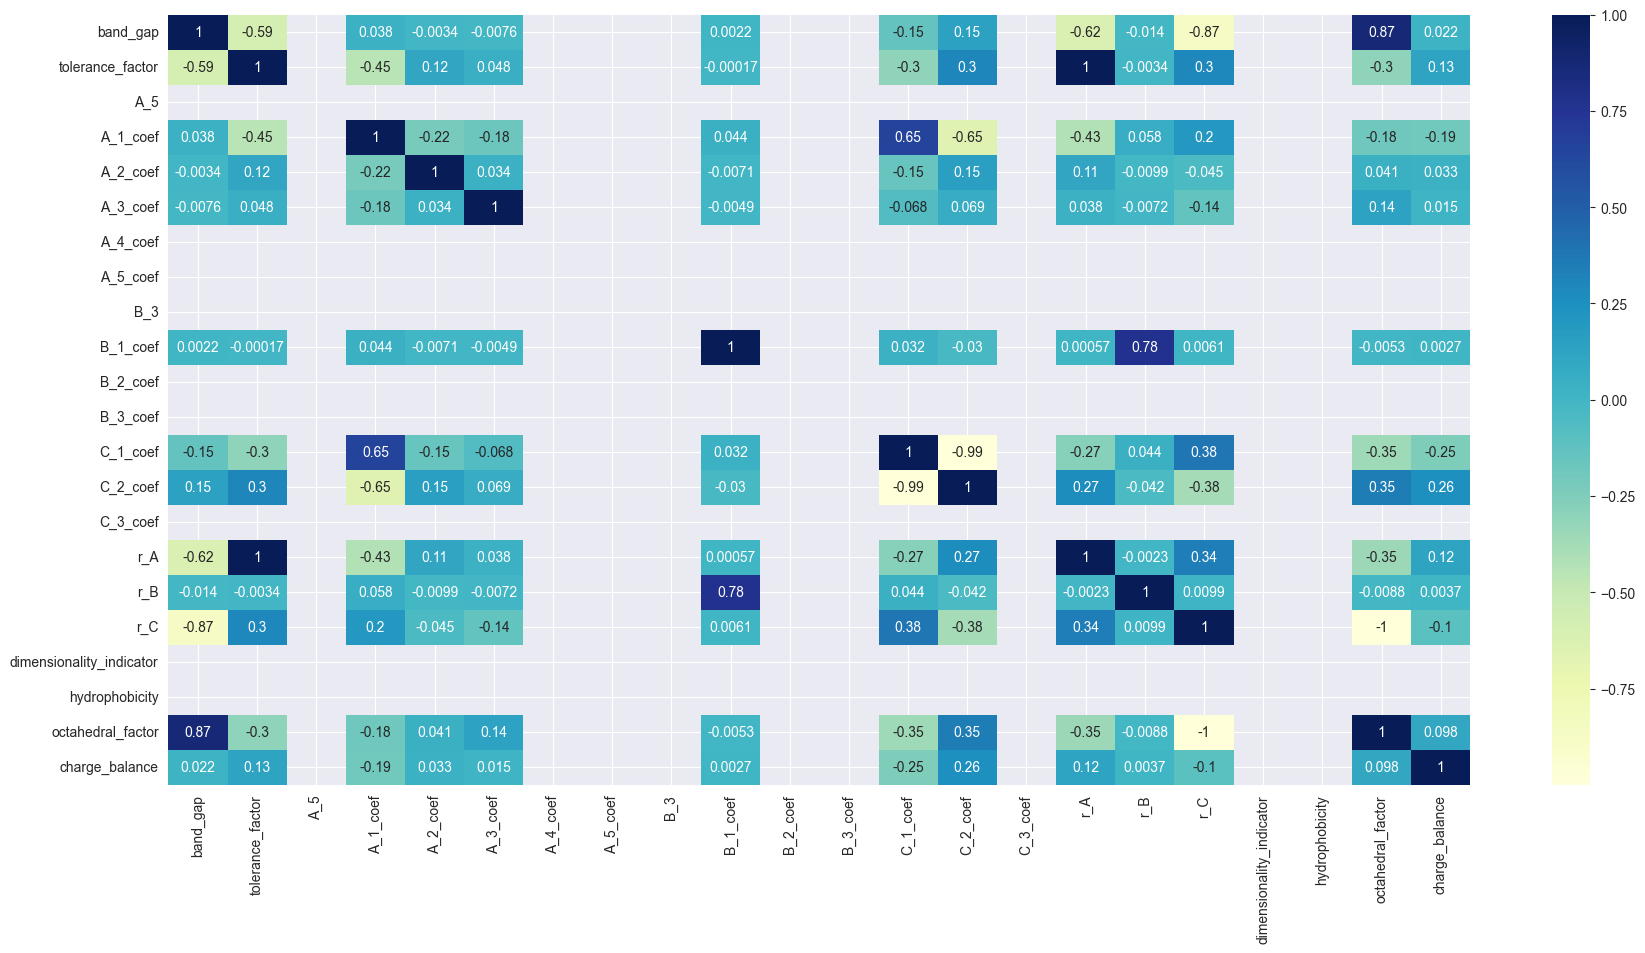

In [13]:
num_df_cols = [col for col in df.columns if df[col].dtype != "object"]
plt.figure(figsize=(21, 10))
sns.heatmap(df[num_df_cols].corr(), annot=True, cmap="YlGnBu")
plt.show()

In [14]:
band_gap_corr = df[num_df_cols].corr()["band_gap"].drop("band_gap").dropna()
band_gap_corr

tolerance_factor    -0.585806
A_1_coef             0.038103
A_2_coef            -0.003368
A_3_coef            -0.007584
B_1_coef             0.002163
C_1_coef            -0.147621
C_2_coef             0.147890
r_A                 -0.619334
r_B                 -0.013646
r_C                 -0.868302
octahedral_factor    0.872260
charge_balance       0.022357
Name: band_gap, dtype: float64

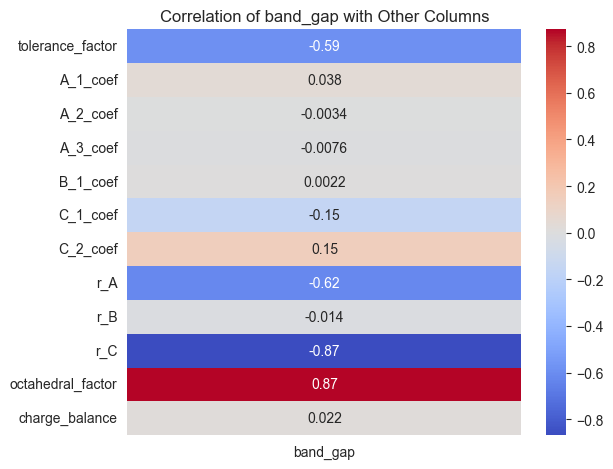

In [15]:
sns.heatmap(band_gap_corr.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation of band_gap with Other Columns')
plt.tight_layout()
plt.show()

### Check distributions - normalize if need

In [16]:
# check skew
skew_series = df[num_df_cols].drop("band_gap", axis=1).skew()
skew_series

tolerance_factor            -0.908969
A_5                          0.000000
A_1_coef                    -3.164834
A_2_coef                    65.494105
A_3_coef                    47.092519
A_4_coef                     0.000000
A_5_coef                     0.000000
B_3                          0.000000
B_1_coef                   -35.697394
B_2_coef                     0.000000
B_3_coef                     0.000000
C_1_coef                    -2.433102
C_2_coef                     2.459583
C_3_coef                     0.000000
r_A                         -1.104025
r_B                          0.000000
r_C                         -5.201448
dimensionality_indicator     0.000000
hydrophobicity               0.000000
octahedral_factor            5.440737
charge_balance               0.000000
dtype: float64

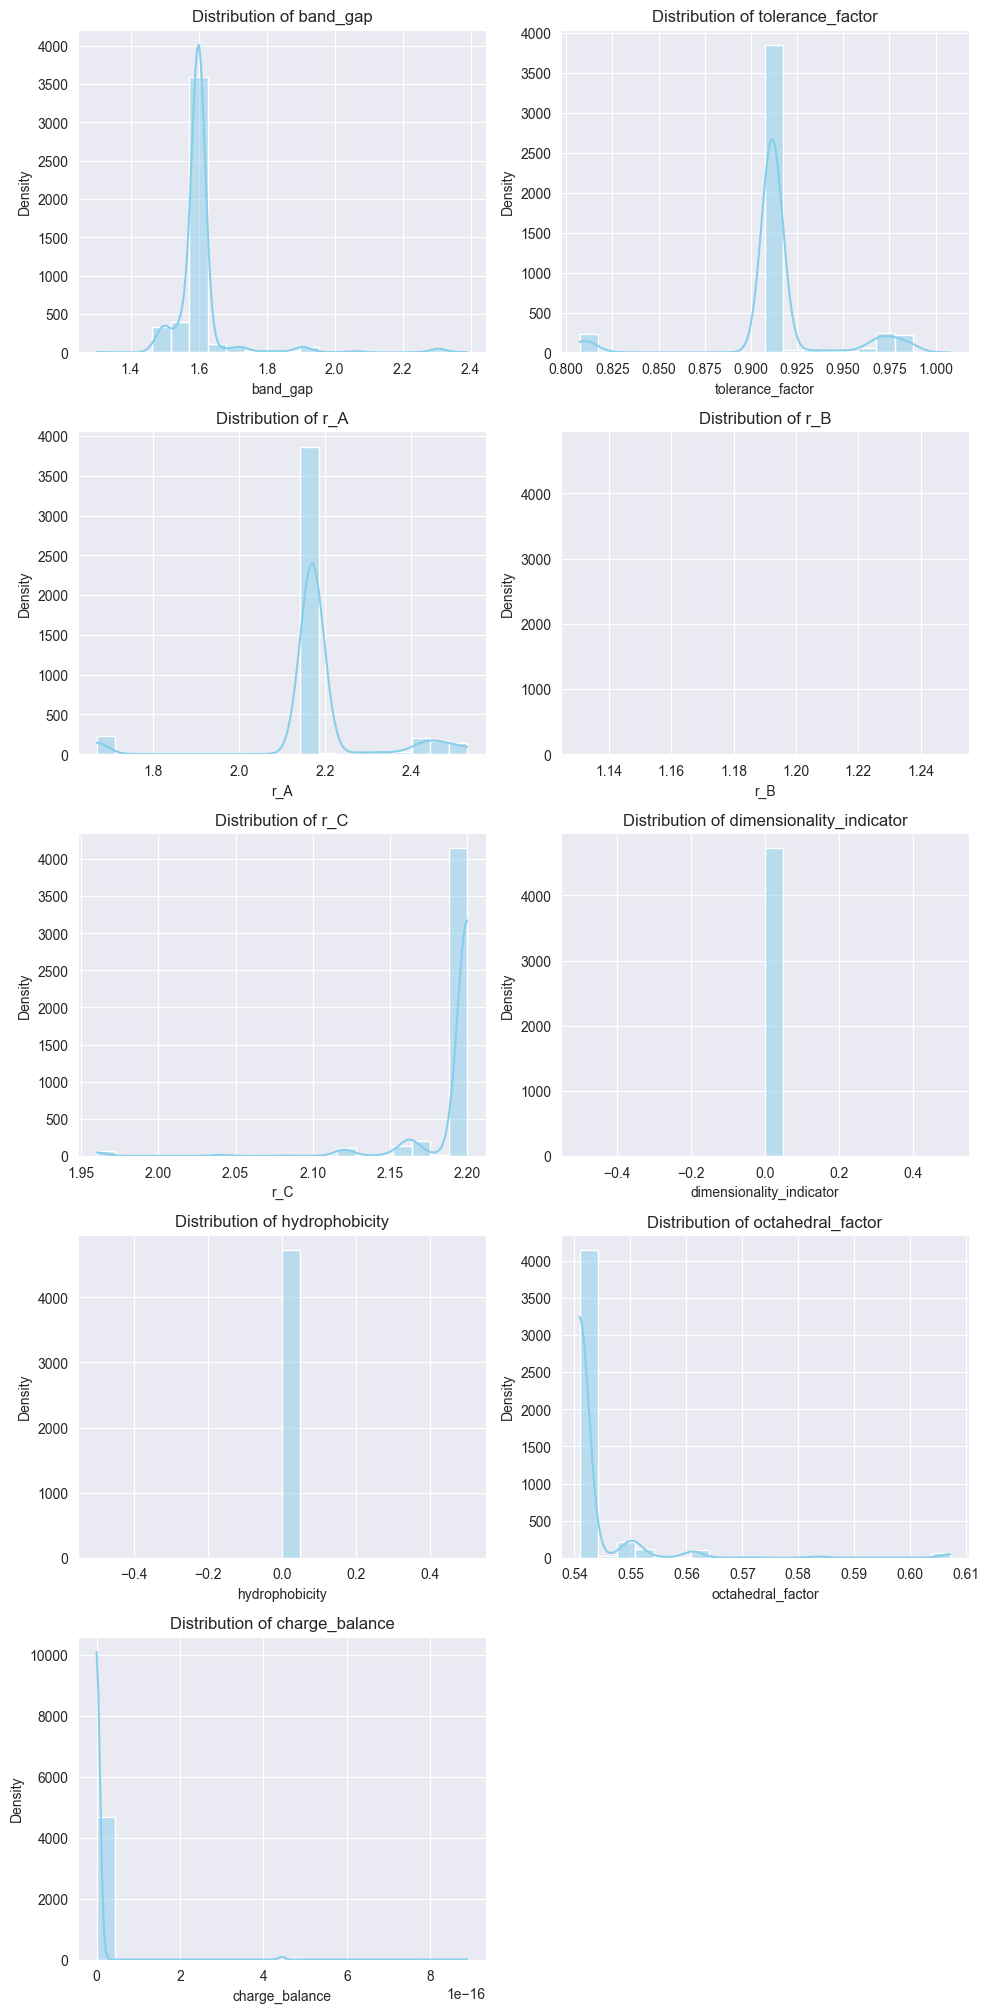

In [17]:
# plots
def _filter_ion_col(col: str) -> bool:
    if col.startswith("A") or col.startswith("B") or col.startswith("C"):
        return False
    return True


num_df_cols = list(filter(_filter_ion_col, num_df_cols))
num_df = df[num_df_cols]

n_cols = 2
n_features = df.shape[1]
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 4), sharey=False)
axes = axes.flatten() if n_features > 1 else [axes]

# Plot distribution for each column
for i, column in enumerate(num_df.columns):
    sns.histplot(num_df[column], kde=True, ax=axes[i], color='skyblue', bins=20)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
# drop unnecessary features
df.drop(columns=["dimensionality_indicator", "hydrophobicity", "charge_balance"], inplace=True)

### Boxplots

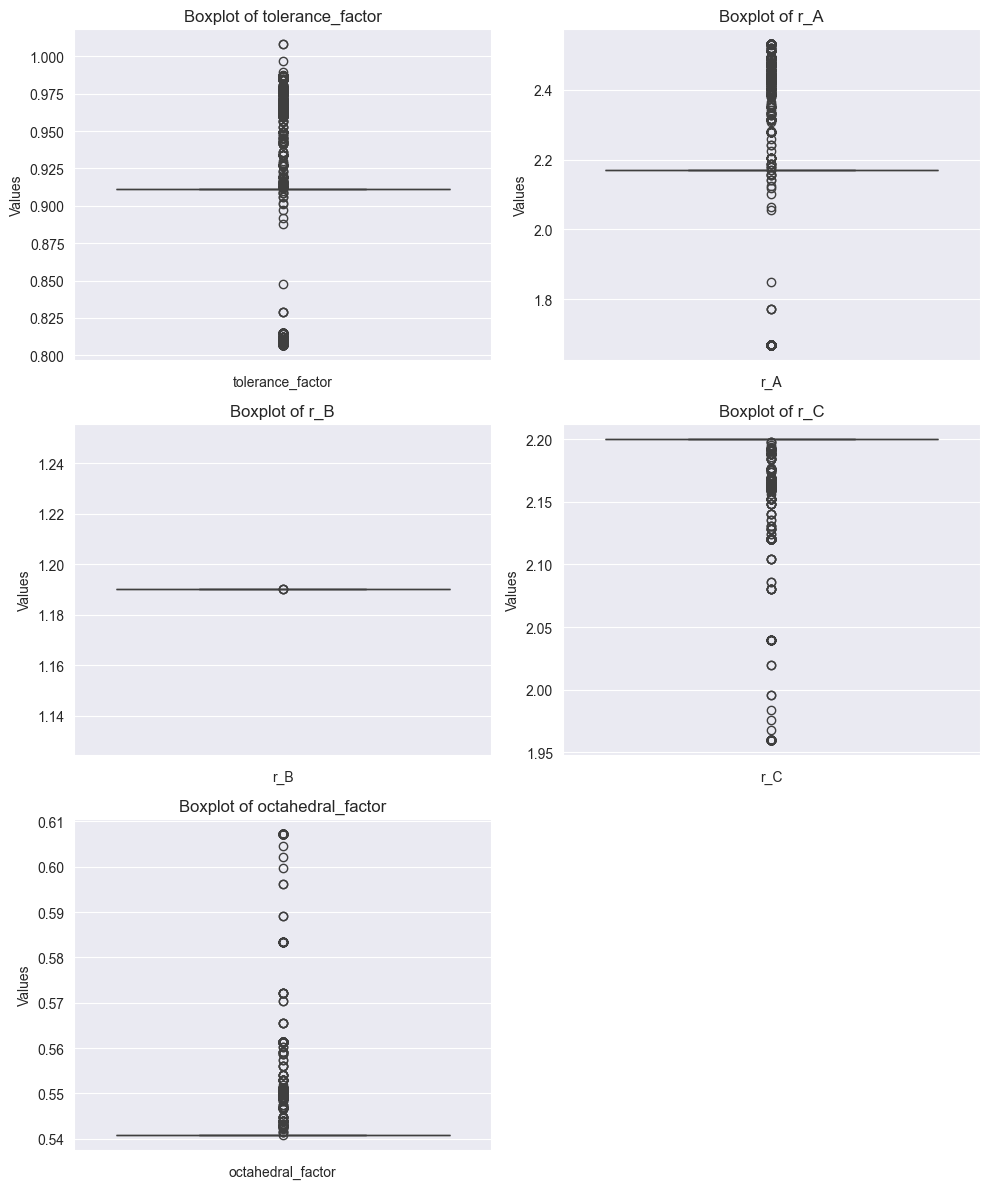

In [19]:
num_df_cols = [col for col in df.columns if df[col].dtype != "object"]
num_df_cols = list(filter(_filter_ion_col, num_df_cols))
num_df_cols.remove("band_gap")
num_df = df[num_df_cols]

n_cols = 2
n_features = num_df.shape[1]
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 4), sharey=False)
axes = axes.flatten() if n_features > 1 else [axes]

for i, column in enumerate(num_df.columns):
    sns.boxplot(ax=axes[i], y=num_df[column])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Values')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### Model building preprocess

In [20]:
from perovskite_data_analysis.entities.elements import Elements

def encode_ion(ion: str):
    if isinstance(ion, int) or ion == "0":
        return ion
    ion = ion.replace("(", "").replace(")", "").strip()
    element = Elements.get_element_by_name(ion)
    return element.code

In [21]:
ion_cols = ["A_1", "A_2", "A_3", "A_4", "A_5", "B_1", "B_2", "B_3", "C_1", "C_2", "C_3"]
for col in ion_cols:
    df[col] = df[col].apply(encode_ion).astype(int)

In [22]:
# encode space groups
from perovskite_data_analysis.entities.space_group import SpaceGroup

df["space_group"] = df["space_group"].apply(SpaceGroup.get_code_by_name)
df

,band_gap,tolerance_factor,A_1,A_2,A_3,A_4,A_5,A_1_coef,A_2_coef,A_3_coef,...,C_2,C_3,C_1_coef,C_2_coef,C_3_coef,r_A,r_B,r_C,space_group,octahedral_factor
0,1.60,0.911521,1,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,2.17000,1.19,2.2000,2,0.540909
1,1.60,0.911521,1,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,2.17000,1.19,2.2000,2,0.540909
2,1.60,0.911521,1,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,2.17000,1.19,2.2000,2,0.540909
3,1.60,0.911521,1,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,2.17000,1.19,2.2000,2,0.540909
4,1.59,0.968626,3,2,1,0,0,0.05,0.788,0.162,...,48,0,0.51,2.49,0,2.42868,1.19,2.1592,2,0.551130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4716,1.55,0.977083,3,2,1,0,0,0.05,0.940,0.010,...,48,0,0.03,2.97,0,2.48340,1.19,2.1976,2,0.541500
4717,1.63,0.911521,1,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,2.17000,1.19,2.2000,2,0.540909
4718,1.63,0.911521,1,0,0,0,0,1.00,0.000,0.000,...,0,0,3.00,0.00,0,2.17000,1.19,2.2000,2,0.540909
4719,1.51,0.972261,3,2,0,0,0,0.08,0.920,0.000,...,0,0,3.00,0.00,0,2.46120,1.19,2.2000,2,0.540909


### Build model

In [29]:
# validate with KFold
from sklearn.model_selection import KFold, train_test_split
from xgboost import XGBRFRegressor
from sklearn.metrics import r2_score, mean_squared_error

X, y = df.drop(columns=["band_gap"]), df["band_gap"]

k_fold = KFold(n_splits=5, shuffle=True)
mse_scores = []
r2_scores = []

model = XGBRFRegressor(
    n_estimators=100,
    learning_rate=0.9,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.8,
    colsample_bytree=0.7,
    objective="reg:squarederror",
    eval_metric="rmse",
    random_state=42,
    n_jobs=-1
)
fold_numbers = []
test_indexes = []

for i, (train_index, test_index) in enumerate(k_fold.split(X)):
    fold_numbers.extend([i] * len(test_index))
    test_indexes.extend(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)
    r2_scores.append(r2)
    print(f'For iteration {i} - MSE: {mse}, R2: {r2}')


For iteration 0 - MSE: 0.0015169812970063552, R2: 0.8566527917809503
For iteration 1 - MSE: 0.0010771884650595386, R2: 0.8901678128987999
For iteration 2 - MSE: 0.0014552131889037155, R2: 0.8742645472557662
For iteration 3 - MSE: 0.0016813766130896633, R2: 0.8111752435424815
For iteration 4 - MSE: 0.001240471643418434, R2: 0.9096207674546808


In [31]:
# general train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}, R2: {r2}')

MSE: 0.0012154905299590314, R2: 0.8175822258934549


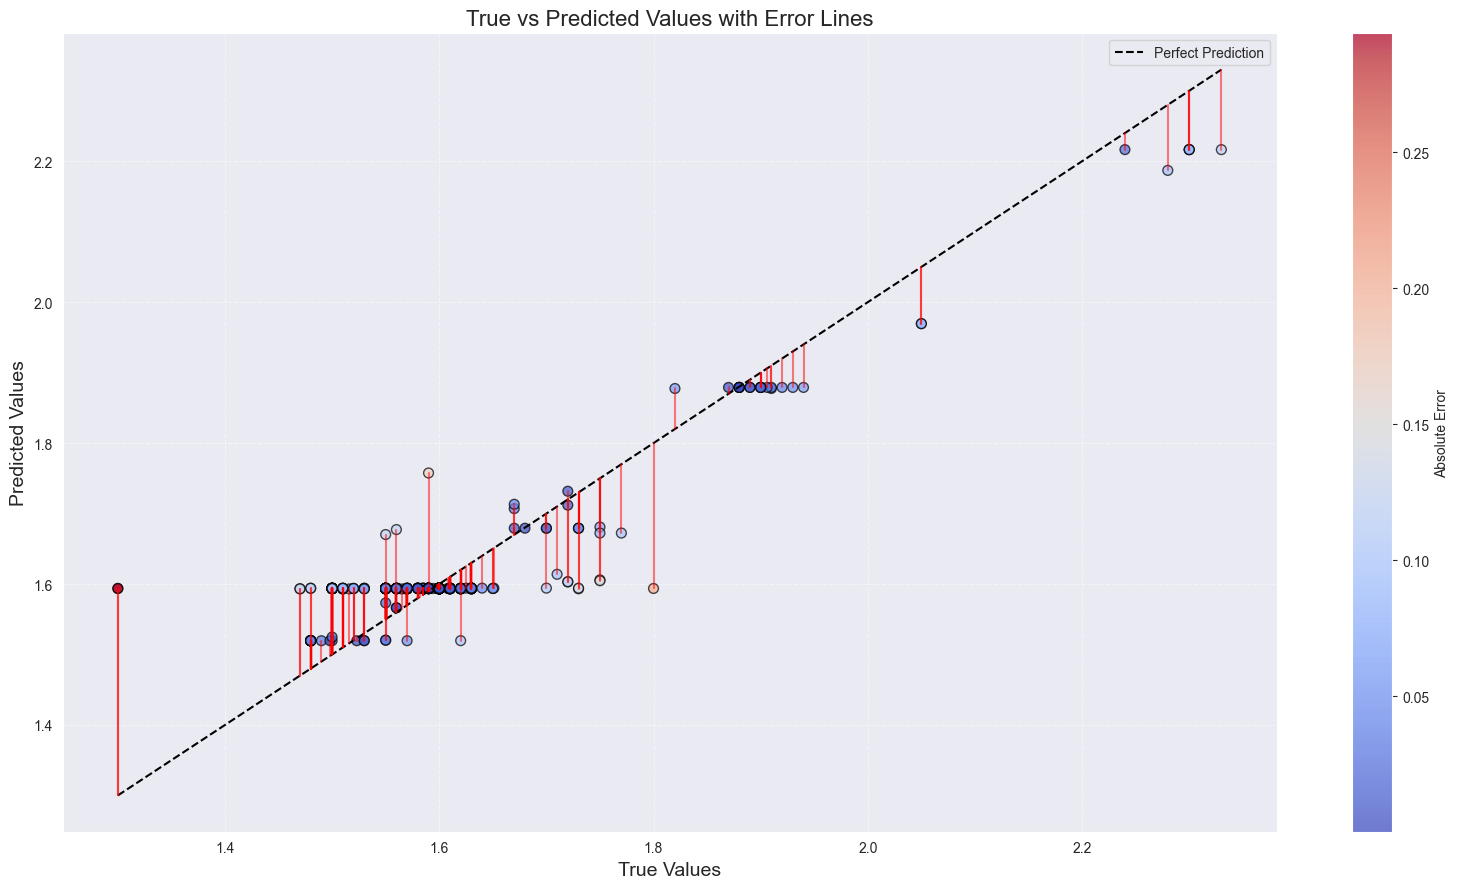

In [34]:
errors = np.abs(y_test - predictions)

plt.figure(figsize=(16, 9))
scatter = plt.scatter(y_test, predictions, c=errors, cmap='coolwarm', s=50, alpha=0.7, edgecolor='k')

min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

for i in range(len(y_test)):
    plt.plot([y_test.iloc[i], y_test.iloc[i]], [y_test.iloc[i], predictions[i]], 'r-', alpha=0.5)

plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('True vs Predicted Values with Error Lines', fontsize=16)
plt.colorbar(scatter, label='Absolute Error')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [42]:
# save model
model.save_model('band_gap_xgboost_MA_FA_Cs_Pb_I_Br.json')
storage.upload_file('band_gap_xgboost_MA_FA_Cs_Pb_I_Br.json')

b'1ds7Q_IU5M-U2bzAWw-_2sO3Qz8kuahE9'